# Introduction to Machine Learning and AI

# Final-Project ：Thinking about Purchasing Stock  Case Study

# Group 2 : Qi Zhang && Xinmeng Liu

## Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

plt.style.use('ggplot')


## Import the data set

In [2]:
FILE1 = "csv_file\Apple.csv"
FILE2 = "csv_file\Microsoft.csv"
df_apple = pd.read_csv(FILE1)
df_microsoft = pd.read_csv(FILE2)

## Data Cleansing

In [3]:
print(df_apple.isnull().any())
print(df_microsoft.isnull().any())
# No value is missing in these 2 data sets

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


### Drop 2020 data

In [4]:
df_apple = df_apple[df_apple["Date"].str.contains("2020") == False]
df_microsoft = df_microsoft[df_microsoft["Date"].str.contains("2020") == False]
# The 2020 data is not needed at all due to COVID-19 impacts.

### Turn the date into index

In [5]:
df_apple['Date'] = pd.to_datetime(df_apple.Date, format='%Y-%m-%d')
df_apple.index = df_apple['Date']

df_microsoft['Date'] = pd.to_datetime(df_microsoft.Date, format='%Y-%m-%d')
df_microsoft.index = df_microsoft['Date']

### The basic info of Apple stock

In [6]:
print(df_apple.info())
print(df_apple.describe())
print(df_apple.head())
print(df_apple.corr())
print(df_apple.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10248 entries, 1980-12-12 to 2022-08-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10248 non-null  datetime64[ns]
 1   Open       10248 non-null  float64       
 2   High       10248 non-null  float64       
 3   Low        10248 non-null  float64       
 4   Close      10248 non-null  float64       
 5   Adj Close  10248 non-null  float64       
 6   Volume     10248 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 640.5 KB
None
               Open          High           Low         Close     Adj Close  \
count  10248.000000  10248.000000  10248.000000  10248.000000  10248.000000   
mean      13.199479     13.339672     13.061867     13.206506     12.570622   
std       30.388313     30.738308     30.062666     30.418153     30.107344   
min        0.049665      0.049665      0.049107      0.04910

### The basic info of Microsoft stock

In [7]:
print(df_microsoft.info())
print(df_microsoft.describe())
print(df_microsoft.head())
print(df_microsoft.corr())
print(df_microsoft.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8922 entries, 1986-03-13 to 2022-08-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8922 non-null   datetime64[ns]
 1   Open       8922 non-null   float64       
 2   High       8922 non-null   float64       
 3   Low        8922 non-null   float64       
 4   Close      8922 non-null   float64       
 5   Adj Close  8922 non-null   float64       
 6   Volume     8922 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 557.6 KB
None
              Open         High          Low        Close    Adj Close  \
count  8922.000000  8922.000000  8922.000000  8922.000000  8922.000000   
mean     39.405219    39.813412    38.982464    39.412798    34.235384   
std      59.241808    59.807334    58.622170    59.252423    59.453134   
min       0.088542     0.092014     0.088542     0.090278     0.056745   
25%    

### check the correlations through heatmap 

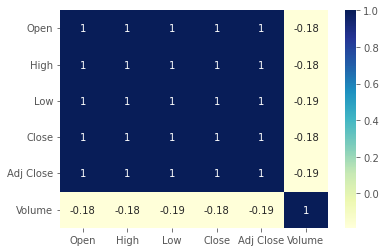

In [8]:
dataplot = sn.heatmap(df_apple.corr(), cmap='YlGnBu', annot=True)

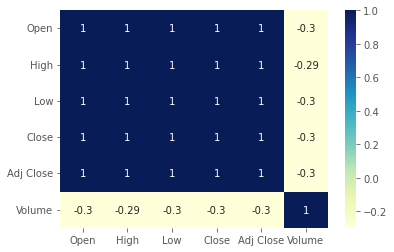

In [9]:
dataplot = sn.heatmap(df_microsoft.corr(), cmap='YlGnBu', annot=True)

# Analysis

## Check the trend by close price

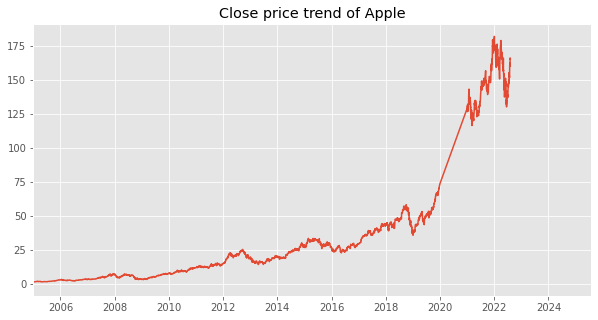

In [10]:
plt.figure(figsize=(10, 5))
plt.title('Close price trend of Apple')
plt.grid(True)
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2025, 8, 1)
plt.xlim(dstart, dstop)
plt.plot(df_apple['Close'], label='Close Price history')

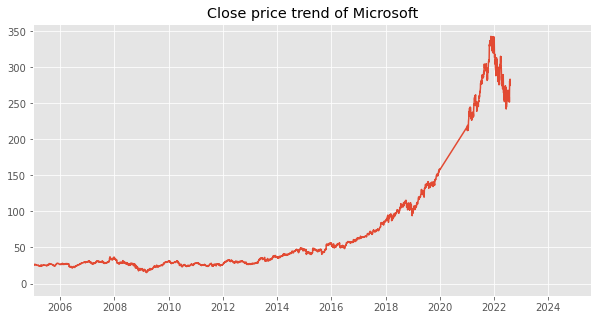

In [11]:
plt.figure(figsize=(10, 5))
plt.title('Close price trend of Microsoft')
plt.grid(True)
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2025, 8, 1)
plt.xlim(dstart, dstop)
plt.plot(df_microsoft['Close'], label='Close Price history')

## Check the trend by MA of adjusted price

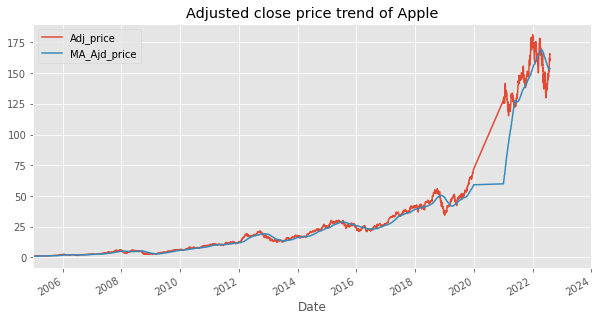

In [12]:
adj_price = df_apple['Adj Close']

plt.figure(figsize=(10, 5))
plt.title('Adjusted close price trend of Apple')
plt.grid(True)
MA_adj_price = adj_price.rolling(window=100).mean()
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2024, 1, 1)
plt.xlim(dstart, dstop)
adj_price.plot(label='Adj_price')
MA_adj_price.plot(label='MA_Ajd_price')
plt.legend()
#plt.savefig(r'C:\Users\Marsy\Desktop\1.png',dpi=300, bbox_inches='tight')

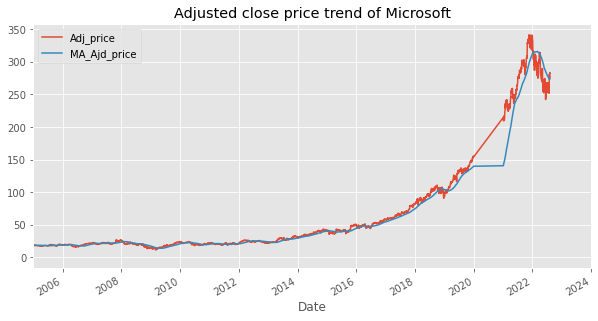

In [13]:
adj_price = df_microsoft['Adj Close']

plt.figure(figsize=(10, 5))
plt.title('Adjusted close price trend of Microsoft')
plt.grid(True)
MA_adj_price = adj_price.rolling(window=100).mean()
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2024, 1, 1)
plt.xlim(dstart, dstop)
adj_price.plot(label='Adj_price')
MA_adj_price.plot(label='MA_Ajd_price')
plt.legend()
# plt.savefig(r'C:\Users\Marsy\Desktop\2.png',dpi=300, bbox_inches='tight')

## Calculate the Rate of Return by Adj Close

<AxesSubplot:title={'center':'Rate of Return of Apple'}, xlabel='Date'>

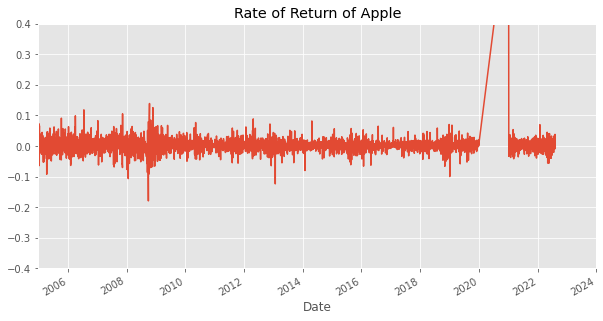

In [14]:
adj_price = df_apple['Adj Close']

plt.figure(figsize=(10, 5))
plt.title('Rate of Return of Apple')
plt.grid(True)
AP_ror = adj_price / adj_price.shift(1) - 1
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2024, 1, 1)
plt.xlim(dstart, dstop)
plt.ylim([-0.4, 0.4])
AP_ror.plot()

<AxesSubplot:title={'center':'Rate of Return of Microsoft'}, xlabel='Date'>

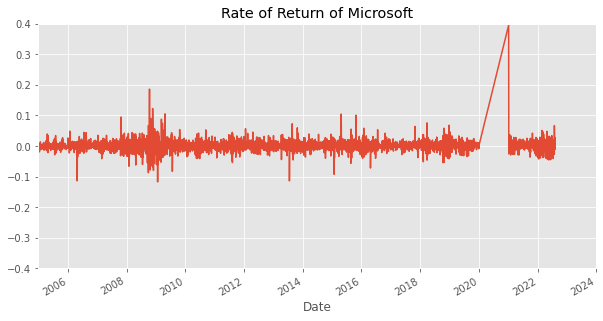

In [15]:
adj_price = df_microsoft['Adj Close']

plt.figure(figsize=(10, 5))
plt.title('Rate of Return of Microsoft')
plt.grid(True)
MS_ror = adj_price / adj_price.shift(1) - 1
dstart = datetime.datetime(2005, 1, 1)
dstop = datetime.datetime(2024, 1, 1)
plt.xlim(dstart, dstop)
plt.ylim([-0.4, 0.4])
MS_ror.plot()

## Check the correlation between stocks

array([[<AxesSubplot:xlabel="('Apple Adj Close',)", ylabel="('Apple Adj Close',)">,
        <AxesSubplot:xlabel="('Microsoft Adj Close',)", ylabel="('Apple Adj Close',)">],
       [<AxesSubplot:xlabel="('Apple Adj Close',)", ylabel="('Microsoft Adj Close',)">,
        <AxesSubplot:xlabel="('Microsoft Adj Close',)", ylabel="('Microsoft Adj Close',)">]],
      dtype=object)

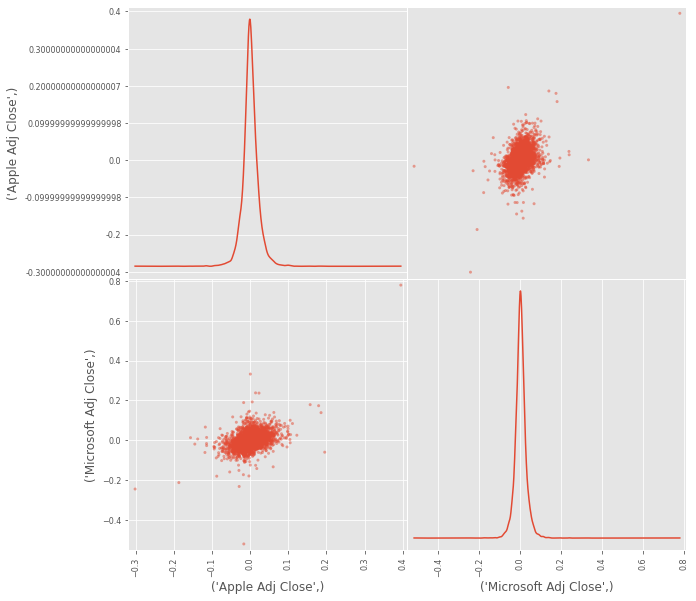

In [16]:
from pandas.plotting import scatter_matrix

df_adj = pd.concat([df_microsoft['Adj Close'], df_apple['Adj Close']], axis=1)
df_adj.columns = [['Apple Adj Close', 'Microsoft Adj Close']]
scatter_matrix(df_adj.pct_change(), diagonal='kde', figsize=(10, 10))

## Check the Expected Returns and Risk

(0.015, 0.035)

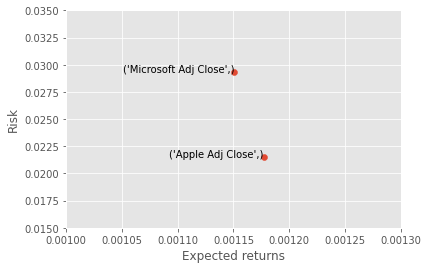

In [17]:
pct_change = df_adj.pct_change()
plt.scatter(pct_change.mean(), pct_change.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(pct_change.columns, pct_change.mean(), pct_change.std()):
    plt.text(x, y, label, ha='right')
plt.xlim([0.001, 0.0013])
plt.ylim([0.015, 0.035])

## Train the models to predict the trend of adjusted price

### Step 1: Add new features

In [18]:
# copy the original data
df_reg_apple = df_apple.copy().loc[:, ['Adj Close', 'Volume']]
df_reg_microsoft = df_microsoft.copy().loc[:, ['Adj Close', 'Volume']]

# define PCT_change
df_reg_apple['PCT_change'] = (df_apple['Close'] - df_apple['Open']) / df_apple['Open'] * 100.0
df_reg_microsoft['PCT_change'] = (df_microsoft['Close'] - df_microsoft['Open']) / df_microsoft['Open'] * 100.0

# define HL_PCT
df_reg_apple['HL_PCT'] = ((df_apple['High'] - df_apple['Low']) / df_apple['Close']) * 100.0
df_reg_microsoft['HL_PCT'] = ((df_microsoft['High'] - df_microsoft['Low']) / df_microsoft['Close']) * 100.0

# define High_Low
df_reg_apple['High_Low'] = ((df_apple['High'] - df_apple['Low']) / df_apple['Low']) * 100
df_reg_microsoft['High_Low'] = ((df_microsoft['High'] - df_microsoft['Low']) / df_microsoft['Low']) * 100

# define Increase_Decrease
df_reg_apple['Increase_Decrease'] = np.where(df_apple['Volume'].shift(-1) > df_apple['Volume'], 1, 0)
df_reg_microsoft['Increase_Decrease'] = np.where(df_microsoft['Volume'].shift(-1) > df_microsoft['Volume'], 1, 0)

# define Buy_Sell_on_Open
df_reg_apple['Buy_Sell_on_Open'] = np.where(df_apple['Open'].shift(-1) > df_apple['Open'], 1, 0)
df_reg_microsoft['Buy_Sell_on_Open'] = np.where(df_microsoft['Open'].shift(-1) > df_microsoft['Open'], 1, 0)

# define Buy_Sell
df_reg_apple['Buy_Sell'] = np.where(df_apple['Adj Close'].shift(-1) > df_apple['Adj Close'], 1, 0)
df_reg_microsoft['Buy_Sell'] = np.where(df_microsoft['Adj Close'].shift(-1) > df_microsoft['Adj Close'], 1, 0)

# define Returns
df_reg_apple['Returns'] = df_apple['Adj Close'].pct_change()
df_reg_microsoft['Returns'] = df_microsoft['Adj Close'].pct_change()

In [19]:
df_reg_apple.head()

,Adj Close,Volume,PCT_change,HL_PCT,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,
1980-12-12,0.100039,469033600,0.000000,0.434756,0.434756,0,0,0,NaN
1980-12-15,0.094820,175884800,-0.456591,0.458685,0.458685,0,0,0,-0.052170
1980-12-16,0.087861,105728000,-0.492580,0.495019,0.495019,0,1,1,-0.073392
1980-12-17,0.090035,86441600,0.000000,0.483063,0.483063,0,1,1,0.024744
1980-12-18,0.092646,73449600,0.000000,0.469452,0.469452,0,1,1,0.029000


In [20]:
df_reg_microsoft.head()

,Adj Close,Volume,PCT_change,HL_PCT,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,
1986-03-13,0.061109,1031788800,9.803257,13.393059,14.706015,0,1,1,NaN
1986-03-14,0.063292,308160000,3.571208,5.173099,5.357841,0,1,1,0.035723
1986-03-17,0.064384,133171200,1.725028,2.543175,2.587046,0,1,0,0.017253
1986-03-18,0.062746,67766400,-2.543175,4.348567,4.386710,0,0,0,-0.025441
1986-03-19,0.061655,47894400,-1.739026,3.539606,3.571208,1,0,0,-0.017388


### Step2: Preprocess the data set

In [21]:
# drop the null values
df_reg_apple = df_reg_apple.dropna()
df_reg_microsoft = df_reg_microsoft.dropna()

# get the data between 2005-1-1 and 2022-8-1
df_reg_apple = df_reg_apple['2005-1-1':'2022-8-1']
df_reg_microsoft = df_reg_microsoft['2005-1-1':'2022-8-1']

x_apple = df_reg_apple.iloc[:, 1:8].values
x_microsoft = df_reg_microsoft.iloc[:, 1:8].values

y_apple = df_reg_apple['Adj Close'].values
y_microsoft = df_reg_microsoft['Adj Close'].values

# preprocessing
x_apple = MinMaxScaler().fit_transform(x_apple)
x_microsoft = MinMaxScaler().fit_transform(x_microsoft)

# train test split
x_apple_train, x_apple_test, y_apple_train, y_apple_test = train_test_split(x_apple, y_apple,
                                                                            test_size=0.01,
                                                                            random_state=17,
                                                                            shuffle=True)

x_microsoft_train, x_microsoft_test, y_microsoft_train, y_microsoft_test = train_test_split(x_microsoft, y_microsoft,
                                                                                            test_size=0.01,
                                                                                            random_state=17,
                                                                                            shuffle=True)

In [22]:
# Train the 7 modelS with Apple data
modelSVR_apple = SVR().fit(x_apple_train, y_apple_train)
modelRFR_apple = RandomForestRegressor().fit(x_apple_train, y_apple_train)
modelABR_apple = AdaBoostRegressor().fit(x_apple_train, y_apple_train)
modelGBR_apple = GradientBoostingRegressor().fit(x_apple_train, y_apple_train)
modelLR_apple = LinearRegression(n_jobs=-1).fit(x_apple_train, y_apple_train)
modelDTR_apple = DecisionTreeRegressor().fit(x_apple_train, y_apple_train)
modelKNR_apple = KNeighborsRegressor(n_neighbors=3).fit(x_apple_train, y_apple_train)

In [23]:
print('SVR:', modelSVR_apple.score(x_apple_test, y_apple_test))
print('RandomForestRegressor:', modelRFR_apple.score(x_apple_test, y_apple_test))
print('AdaBoostRegressor:', modelABR_apple.score(x_apple_test, y_apple_test))
print('GradientBoostingRegressor:', modelGBR_apple.score(x_apple_test, y_apple_test))
print('LinearRegression:', modelLR_apple.score(x_apple_test, y_apple_test))
print('DecisionTreeRegressor:', modelDTR_apple.score(x_apple_test, y_apple_test))
print('KNeighborsRegressor:', modelKNR_apple.score(x_apple_test, y_apple_test))

# We can see that the RandomForestRegressor has the best score: 0.9004766402249255

SVR: 0.1347301809273994
RandomForestRegressor: 0.9045680896500891
AdaBoostRegressor: 0.792415164212801
GradientBoostingRegressor: 0.8956349972426463
LinearRegression: 0.46750795307588877
DecisionTreeRegressor: 0.5033676509007793
KNeighborsRegressor: 0.7410970518931721


In [24]:
# Train the 7 modelS with Apple data
modelSVR_apple = SVR().fit(x_microsoft_train, y_microsoft_train)
modelRFR_apple = RandomForestRegressor().fit(x_microsoft_train, y_microsoft_train)
modelABR_apple = AdaBoostRegressor().fit(x_microsoft_train, y_microsoft_train)
modelGBR_apple = GradientBoostingRegressor().fit(x_microsoft_train, y_microsoft_train)
modelLR_apple = LinearRegression(n_jobs=-1).fit(x_microsoft_train, y_microsoft_train)
modelDTR_apple = DecisionTreeRegressor().fit(x_microsoft_train, y_microsoft_train)
modelKNR_apple = KNeighborsRegressor(n_neighbors=3).fit(x_microsoft_train, y_microsoft_train)

In [25]:
print('SVR:', modelSVR_apple.score(x_microsoft_test, y_microsoft_test))
print('RandomForestRegressor:', modelRFR_apple.score(x_microsoft_test, y_microsoft_test))
print('AdaBoostRegressor:', modelABR_apple.score(x_microsoft_test, y_microsoft_test))
print('GradientBoostingRegressor:', modelGBR_apple.score(x_microsoft_test, y_microsoft_test))
print('LinearRegression:', modelLR_apple.score(x_microsoft_test, y_microsoft_test))
print('DecisionTreeRegressor:', modelDTR_apple.score(x_microsoft_test, y_microsoft_test))
print('KNeighborsRegressor:', modelKNR_apple.score(x_microsoft_test, y_microsoft_test))

# We can see that the GradientBoostingRegressor has the best score: 0.6774150367473095

SVR: -0.11970083235958495
RandomForestRegressor: 0.7137133330004424
AdaBoostRegressor: 0.27864214333313353
GradientBoostingRegressor: 0.682938278500506
LinearRegression: 0.1651828307485914
DecisionTreeRegressor: -0.39646119529265733
KNeighborsRegressor: 0.318847926671497


It seems that the stock price of Apple is more predictable than microsoft.

## Try to predict the adj close by date

In [40]:
# preprocessing
df_reg_apple = df_apple.copy().loc[:, ['Adj Close']]
df_reg_apple = df_reg_apple['2005-1-1':'2022-8-1']

# encode the date type data
df_reg_apple = df_reg_apple.iloc[:, [0]].reset_index(drop=True)
y_apple_adj = df_reg_apple.values
x_apple_adj = df_reg_apple.index.values.reshape(-1, 1)
print(df_reg_apple)
x_apple_train, x_apple_test, y_apple_train, y_apple_test = train_test_split(x_apple_adj, y_apple_adj,
                                                                            test_size=0.01,
                                                                            random_state=19)

       Adj Close
0       0.964983
1       0.974894
2       0.983432
3       0.984194
4       1.055854
...          ...
4167  151.389725
4168  156.572510
4169  157.131744
4170  162.284576
4171  161.285965

[4172 rows x 1 columns]


In [41]:
df_reg_microsoft = df_microsoft.copy().loc[:, ['Adj Close']]
df_reg_microsoft = df_reg_microsoft['2005-1-1':'2022-8-1']
df_reg_microsoft = df_reg_microsoft.iloc[:, [0]].reset_index(drop=True)
y_microsoft_adj = df_reg_microsoft.values
x_microsoft_adj = df_reg_microsoft.index.values.reshape(-1, 1)
print(df_reg_microsoft)

x_microsoft_train, x_microsoft_test, y_microsoft_train, y_microsoft_test = train_test_split(x_microsoft_adj,
                                                                                            y_microsoft_adj,
                                                                                            test_size=0.01,
                                                                                            random_state=19)

       Adj Close
0      18.954119
1      19.025005
2      18.982471
3      18.961212
4      18.904505
...          ...
4167  251.899994
4168  268.739990
4169  276.410004
4170  280.739990
4171  278.010010

[4172 rows x 1 columns]


In [42]:
modelSVR_apple = SVR().fit(x_apple_train, y_apple_train)
modelRFR_apple = RandomForestRegressor().fit(x_apple_train, y_apple_train)
modelABR_apple = AdaBoostRegressor().fit(x_apple_train, y_apple_train)
modelGBR_apple = GradientBoostingRegressor().fit(x_apple_train, y_apple_train)
modelLR_apple = LinearRegression(n_jobs=-1).fit(x_apple_train, y_apple_train)
modelDTR_apple = DecisionTreeRegressor().fit(x_apple_train, y_apple_train)
modelKNR_apple = KNeighborsRegressor(n_neighbors=3).fit(x_apple_train, y_apple_train)

print('SVR:', modelSVR_apple.score(x_apple_test, y_apple_test))
print('RandomForestRegressor:', modelRFR_apple.score(x_apple_test, y_apple_test))
print('AdaBoostRegressor:', modelABR_apple.score(x_apple_test, y_apple_test))
print('GradientBoostingRegressor:', modelGBR_apple.score(x_apple_test, y_apple_test))
print('LinearRegression:', modelLR_apple.score(x_apple_test, y_apple_test))
print('DecisionTreeRegressor:', modelDTR_apple.score(x_apple_test, y_apple_test))
print('KNeighborsRegressor:', modelKNR_apple.score(x_apple_test, y_apple_test))

c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ormosia5\AppData\Local\Temp\ipykernel_89296\2841234155.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRFR_apple = RandomForestRegressor().fit(x_apple_train, y_apple_train)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:570

SVR: 0.9144209675551294
RandomForestRegressor: 0.9997784924262391
AdaBoostRegressor: 0.9858299713311238
GradientBoostingRegressor: 0.9991219486655357
LinearRegression: 0.6381134088091925
DecisionTreeRegressor: 0.999521941588286
KNeighborsRegressor: 0.9998237811047961


In [43]:
modelSVR_microsoft = SVR().fit(x_microsoft_train, y_microsoft_train)
modelRFR_microsoft = RandomForestRegressor().fit(x_microsoft_train, y_microsoft_train)
modelABR_microsoft = AdaBoostRegressor().fit(x_microsoft_train, y_microsoft_train)
modelGBR_microsoft = GradientBoostingRegressor().fit(x_microsoft_train, y_microsoft_train)
modelLR_microsoft = LinearRegression(n_jobs=-1).fit(x_microsoft_train, y_microsoft_train)
modelDTR_microsoft = DecisionTreeRegressor().fit(x_microsoft_train, y_microsoft_train)
modelKNR_microsoft = KNeighborsRegressor(n_neighbors=3).fit(x_microsoft_train, y_microsoft_train)

print('SVR:', modelSVR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('RandomForestRegressor:', modelRFR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('AdaBoostRegressor:', modelABR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('GradientBoostingRegressor:', modelGBR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('LinearRegression:', modelLR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('DecisionTreeRegressor:', modelDTR_microsoft.score(x_microsoft_test, y_microsoft_test))
print('KNeighborsRegressor:', modelKNR_microsoft.score(x_microsoft_test, y_microsoft_test))

c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ormosia5\AppData\Local\Temp\ipykernel_89296\68466821.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRFR_microsoft = RandomForestRegressor().fit(x_microsoft_train, y_microsoft_train)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\

SVR: 0.886046846266471
RandomForestRegressor: 0.9998783065001243
AdaBoostRegressor: 0.9884833648783818
GradientBoostingRegressor: 0.9997137079984763
LinearRegression: 0.6224787693482164
DecisionTreeRegressor: 0.9997133475396855
KNeighborsRegressor: 0.9998848066914476


In [44]:
# predict the next day adj close
apple_pred = modelRFR_apple.predict([[4172]])
microsoft_pred = modelRFR_microsoft.predict([[4172]])

print(apple_pred)
print(microsoft_pred)

[160.57425408]
[277.88970348]


In [90]:
# predict the next 15 days adj close

DAY = 15
Original_day = 4171

# apple predict and train itself
for i in range(Original_day, Original_day + DAY, 1):
    apple_pred = modelABR_apple.predict([[i]])
    x_apple_adj = np.append(x_apple_adj, [[i]], axis=0)
    y_apple_adj = np.append(y_apple_adj, [apple_pred], axis=0)
    modelABR_apple = AdaBoostRegressor().fit(x_apple_adj, y_apple_adj)

# Microsoft predict and train itself
for i in range(Original_day, Original_day + DAY, 1):
    microsoft_pred = modelABR_microsoft.predict([[i]])
    x_microsoft_adj = np.append(x_microsoft_adj, [[i]], axis=0)
    y_microsoft_adj = np.append(y_microsoft_adj, [microsoft_pred], axis=0)
    modelABR_microsoft = AdaBoostRegressor().fit(x_microsoft_adj, y_microsoft_adj)




c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ormosia5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:111

## Compare two stock based on the prediction

In [76]:
df_microsoft = pd.DataFrame(data = y_microsoft_adj, columns= ['Microsoft adj close'])
df_apple = pd.DataFrame(data = y_apple_adj, columns= ['Apple adj close'])
df_pred = pd.concat([df_apple,df_microsoft],axis=1)
df_pred

,Apple adj close,Microsoft adj close
0,0.964983,18.954119
1,0.974894,19.025005
2,0.983432,18.982471
3,0.984194,18.961212
4,1.055854,18.904505
...,...,...
4182,143.794045,266.344592
4183,145.911198,267.323606
4184,143.336767,266.146240
4185,146.803876,266.307767


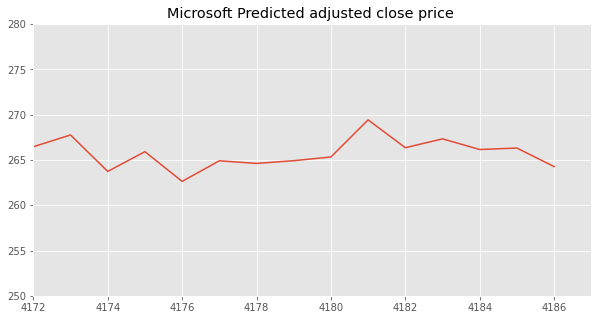

In [103]:
plt.figure(figsize=(10, 5))
plt.title('Microsoft Predicted adjusted close price ')
plt.grid(True)
plt.xlim(4172, 4187)
plt.ylim(250, 280)
plt.plot(df_microsoft)


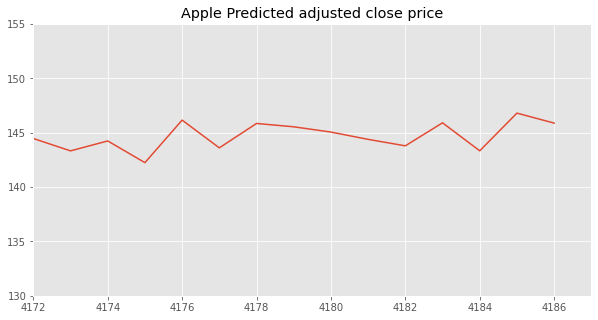

In [106]:
plt.figure(figsize=(10, 5))
plt.title('Apple Predicted adjusted close price')
plt.grid(True)
plt.xlim(4172, 4187)
plt.ylim(130, 155)
plt.plot(df_apple)


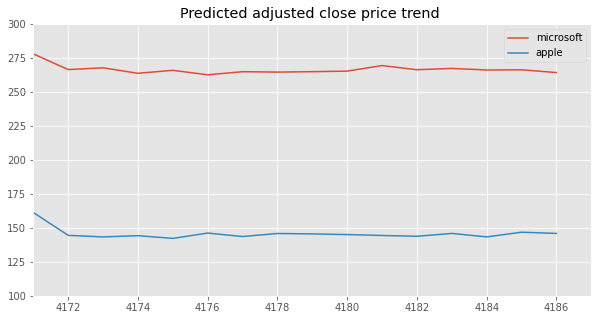

In [108]:
plt.figure(figsize=(10, 5))
plt.title('Predicted adjusted close price trend ')
plt.grid(True)
plt.xlim(4171, 4187)
plt.ylim(100, 300)
plt.plot(df_microsoft,label = 'microsoft')
plt.plot(df_apple,label = 'apple')
plt.legend()

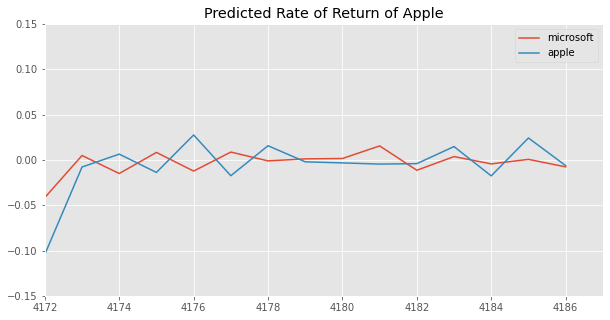

In [89]:
adj_apple = df_apple['Apple adj close']
AP_ror = adj_apple / adj_apple.shift(1) - 1
adj_microsoft= df_microsoft['Microsoft adj close']
MS_ror = adj_microsoft / adj_microsoft.shift(1) - 1
plt.figure(figsize=(10, 5))
plt.title('Predicted Rate of Return of Apple')
plt.grid(True)
plt.xlim(4172, 4187)
plt.ylim([-0.15, 0.15])
plt.plot(MS_ror,label = 'microsoft')
plt.plot(AP_ror,label = 'apple')
plt.legend()